In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("H:/Datasets/Python Projects/Superstore/superstore_sales.xlsx")

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [5]:
df.shape

(51290, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.000000,9.240,36.8100,8399.976
shipping_cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.000000,2013.000,2014.0000,2014.000


In [9]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
year = df['year'].value_counts()
year

2014    17531
2013    13799
2012    10962
2011     8998
Name: year, dtype: int64

Text(0, 0.5, 'Quantity Ordered')

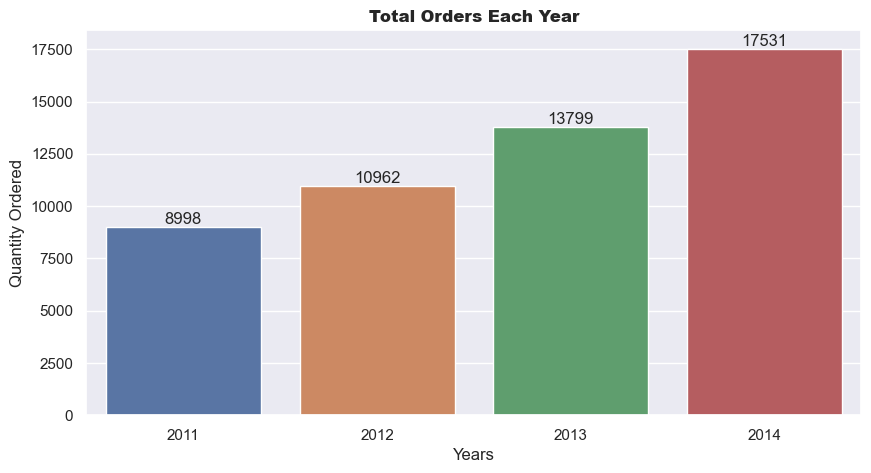

In [11]:
plt.figure(figsize=[10,5])
sns.set_theme(style='darkgrid')
plt.title("Total Orders Each Year", weight = 'heavy')
ax = sns.barplot(x=year.index, y=year.values)

ax.bar_label(ax.containers[0])
plt.xlabel("Years")
plt.ylabel("Quantity Ordered")

In [12]:
# Adding a new column Month Year to show the Overall sales trend

df['month_year'] = df['order_date'].apply(lambda k : k.strftime('%Y-%m'))

In [13]:
trend_df = df.groupby('month_year').sum()
trend_df.head()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.7880,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.1630,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.1855,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.5200,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.2060,1138226


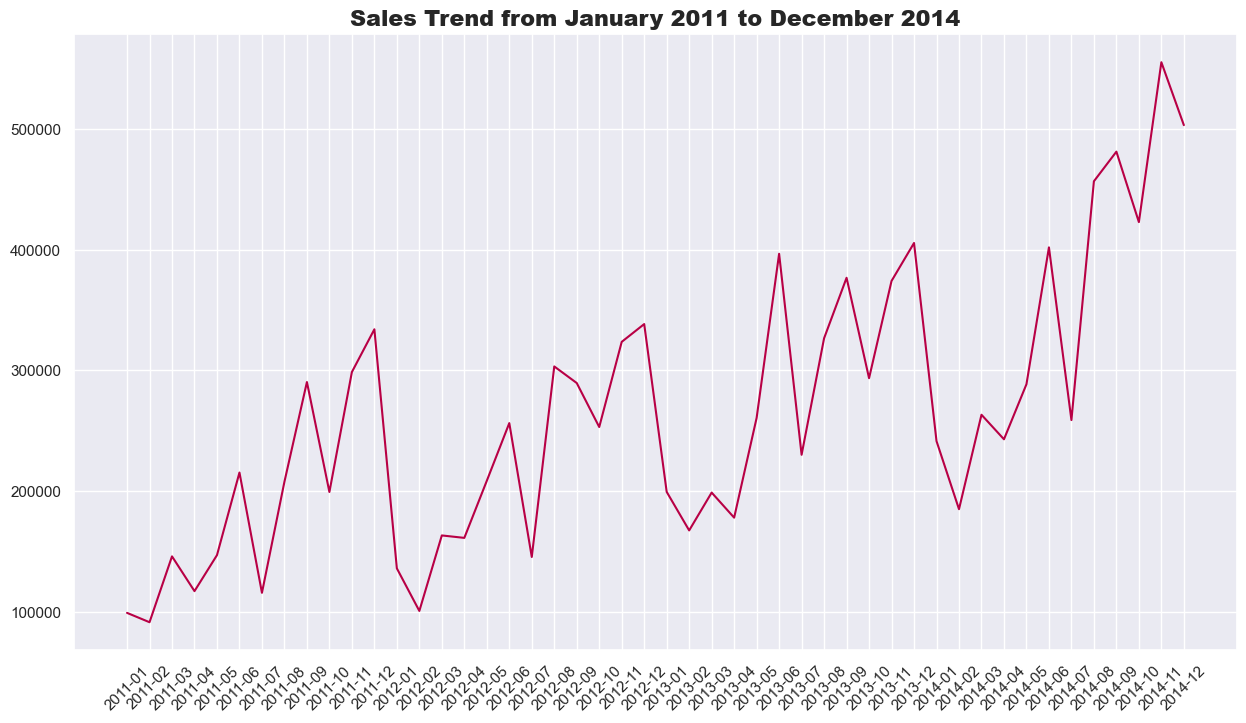

In [14]:
plt.figure(figsize=[15,8])
plt.title("Sales Trend from January 2011 to December 2014", weight='heavy', size=16)
plt.plot(trend_df.index, trend_df['sales'], color='#b80045')
plt.xticks(rotation=45)
plt.show()

In [15]:
sales_year = df.groupby('year').sum()
sales_year

,sales,quantity,discount,profit,shipping_cost
year,,,,,
2011,2.259451e+06,31443,1333.394,248940.81154,244270.34550
2012,2.677439e+06,38111,1548.774,307415.27910,283490.82400
2013,3.405746e+06,48136,1935.522,408512.76018,364548.74436
2014,4.299866e+06,60622,2512.038,504165.97046,460505.78954


<BarContainer object of 4 artists>

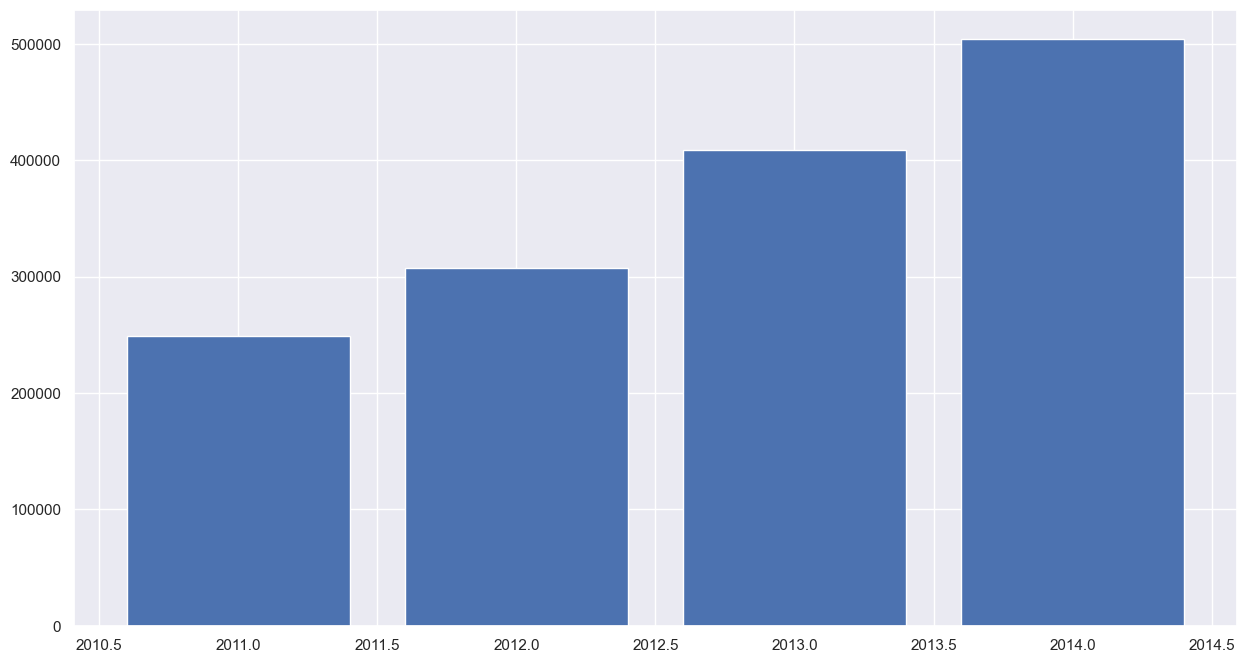

In [16]:
plt.figure(figsize=[15,8])
plt.bar(sales_year.index, 'profit', data = sales_year)

In [17]:
ship_df = df.groupby('ship_mode').count().sort_values(by='order_id', ascending=False).head(10)
ship_df

,order_id,order_date,ship_date,customer_name,segment,state,country,market,region,product_id,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
ship_mode,,,,,,,,,,,,,,,,,,,,,
Standard Class,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,...,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775
Second Class,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,...,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309
First Class,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,...,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505
Same Day,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,...,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701


Text(0, 0.5, 'Count of Orders')

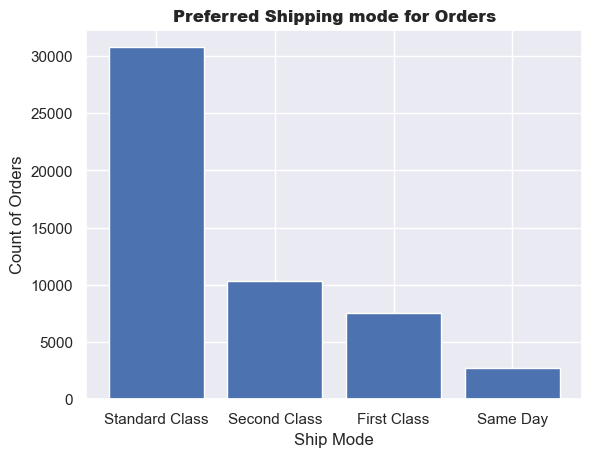

In [18]:
plt.title("Preferred Shipping mode for Orders", weight='heavy')
plt.bar(ship_df.index, ship_df['order_id'])
plt.xlabel("Ship Mode")
plt.ylabel("Count of Orders")

In [19]:
category_df = df.groupby('category').count().sort_values(by='order_id', ascending=False)
category_df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
category,,,,,,,,,,,,,,,,,,,,,
Office Supplies,31273,31273,31273,31273,31273,31273,31273,31273,31273,31273,...,31273,31273,31273,31273,31273,31273,31273,31273,31273,31273
Technology,10141,10141,10141,10141,10141,10141,10141,10141,10141,10141,...,10141,10141,10141,10141,10141,10141,10141,10141,10141,10141
Furniture,9876,9876,9876,9876,9876,9876,9876,9876,9876,9876,...,9876,9876,9876,9876,9876,9876,9876,9876,9876,9876


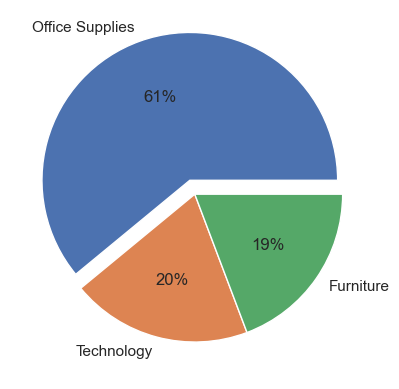

In [20]:
explode = [0.1, 0, 0]
plt.pie(category_df.order_id, labels=category_df.index, explode=explode, autopct='%.0f%%')
plt.show()

In [39]:
country_df = df.groupby('country').count().sort_values(by='order_id', ascending=False)
country_df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,market,region,product_id,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
country,,,,,,,,,,,,,,,,,,,,,
United States,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
Australia,2837,2837,2837,2837,2837,2837,2837,2837,2837,2837,...,2837,2837,2837,2837,2837,2837,2837,2837,2837,2837
France,2827,2827,2827,2827,2827,2827,2827,2827,2827,2827,...,2827,2827,2827,2827,2827,2827,2827,2827,2827,2827
Mexico,2644,2644,2644,2644,2644,2644,2644,2644,2644,2644,...,2644,2644,2644,2644,2644,2644,2644,2644,2644,2644
Germany,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065,...,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065
China,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,...,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880
United Kingdom,1633,1633,1633,1633,1633,1633,1633,1633,1633,1633,...,1633,1633,1633,1633,1633,1633,1633,1633,1633,1633
Brazil,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,...,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
India,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,...,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555


In [37]:
country_df.tail(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,market,region,product_id,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
country,,,,,,,,,,,,,,,,,,,,,
Eritrea,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Swaziland,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Burundi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Chad,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bahrain,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


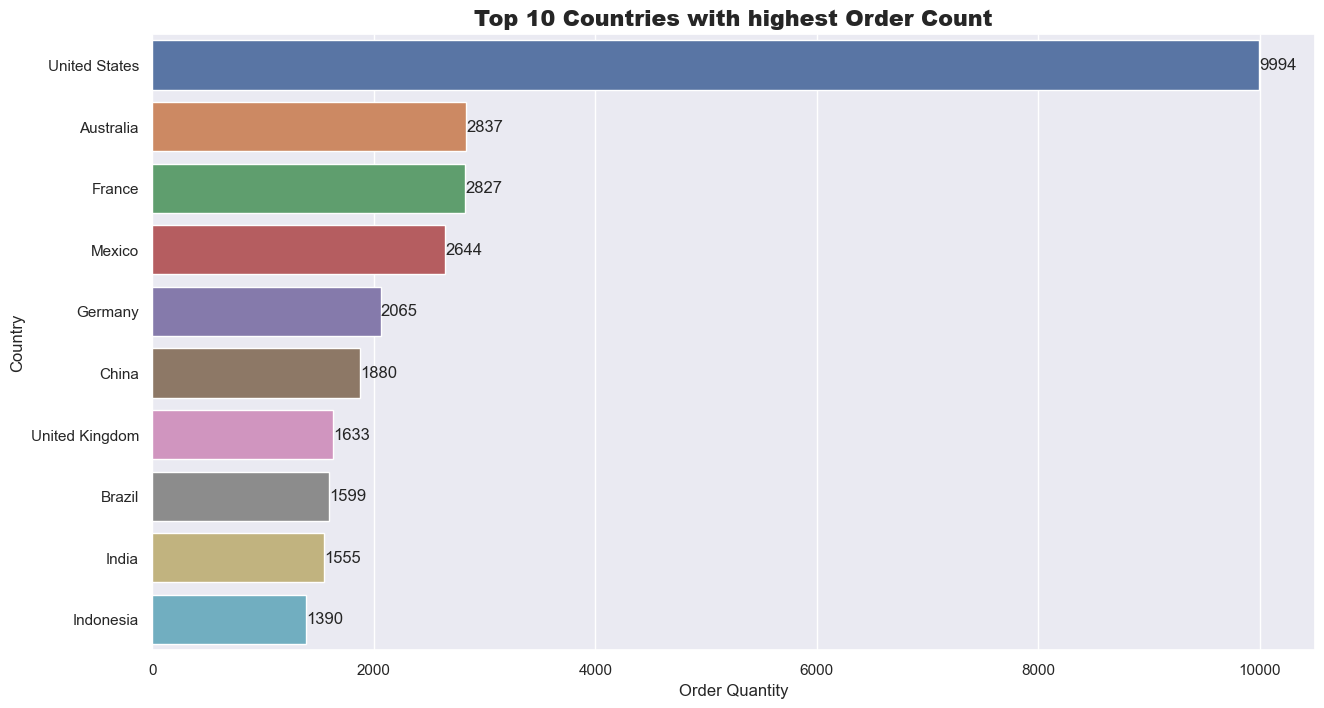

In [22]:
plt.figure(figsize=[15,8])
sns.set_theme(style='darkgrid')
plt.title("Top 10 Countries with highest Order Count", weight='heavy', size=16)
ax = sns.barplot(y = country_df.index, x = country_df['order_id'], orient='h')

plt.xlabel("Order Quantity", size=12)
plt.ylabel("Country", size=12)
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
top_products = df.groupby('product_name').sum().sort_values(by='sales', ascending=False).head(10)
top_products.head(10)

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.71500,102654
"Cisco Smart Phone, Full Size",76441.5306,139,2.07,17238.5206,7065.16600,76495
"Motorola Smart Phone, Full Size",73156.3030,134,5.61,17027.1130,8817.33100,76498
"Nokia Smart Phone, Full Size",71904.5555,147,6.79,9938.1955,7852.66300,94594
Canon imageCLASS 2200 Advanced Copier,61599.8240,20,0.60,25199.9280,1276.32054,10068
"Hon Executive Leather Armchair, Adjustable",58193.4841,169,8.11,5997.2541,5751.54100,98638
"Office Star Executive Leather Armchair, Adjustable",50661.6840,141,6.47,4710.9840,5141.73400,90577
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160,142,6.98,10427.3260,6548.16500,78499
"Samsung Smart Phone, Cordless",48653.4600,108,3.26,-198.0900,5892.07400,52319


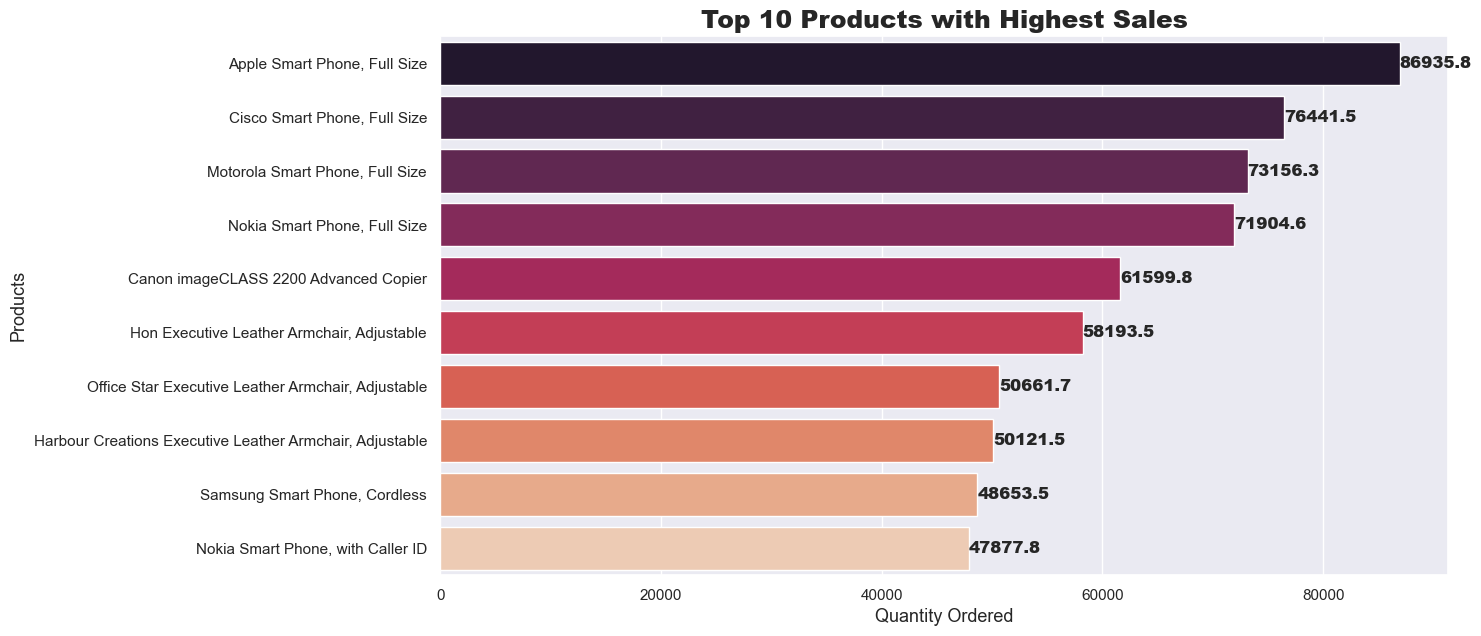

In [24]:
plt.figure(figsize=[13,7])
sns.set_theme(style='darkgrid')
plt.title("Top 10 Products with Highest Sales", weight='heavy', size=18)

ax = sns.barplot(x = 'sales', y = top_products.index, data=top_products, orient='h', palette='rocket')
plt.xlabel("Quantity Ordered", size=13)
plt.ylabel("Products", size=13)

ax.bar_label(ax.containers[0], weight='heavy')
plt.show()

In [25]:
top_customers = df.groupby('customer_name').sum().sort_values(by='profit', ascending=False).head(10)
top_customers

,sales,quantity,discount,profit,shipping_cost,year
customer_name,,,,,,
Tamara Chand,37457.33300,271,16.252,8672.89890,2527.95500,177118
Raymond Buch,29602.14260,262,6.020,8453.04950,2084.22254,142912
Sanjit Chand,26521.13200,244,10.340,8205.37990,2217.84100,138855
Hunter Lopez,30243.56658,207,6.242,7816.56778,1974.53100,106657
Bill Eplett,28479.16740,411,8.522,7410.00530,2695.77400,205335
Harry Marie,28476.93760,313,13.530,6958.28640,2420.20400,171091
Susan Pistek,29020.60386,235,9.402,6484.40726,2481.34700,136865
Mike Gockenbach,23377.07220,185,10.170,6458.67620,1681.81000,102662
Adrian Barton,25123.18000,265,16.100,6417.28450,2638.28400,154991


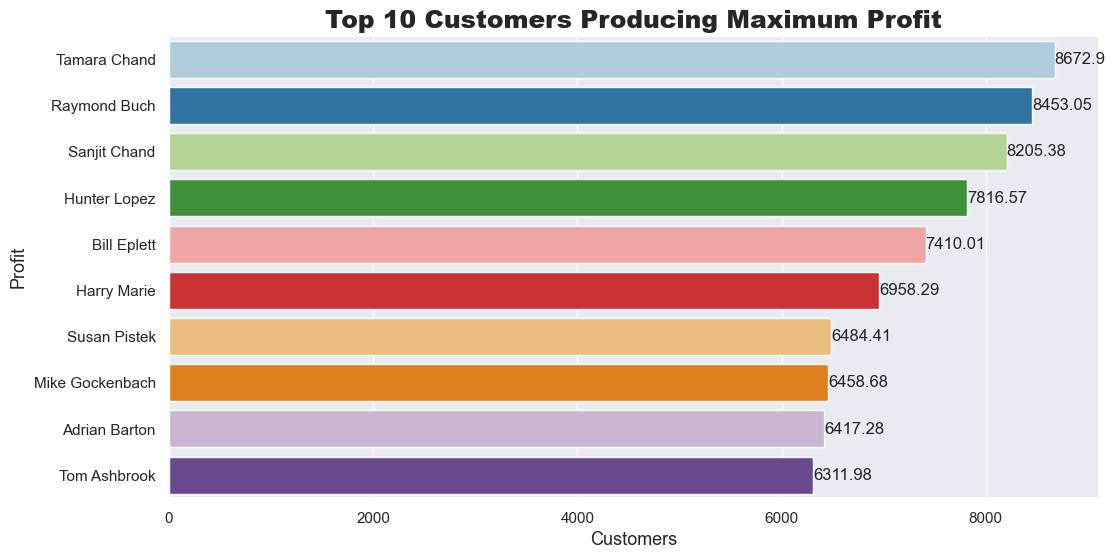

In [26]:
plt.figure(figsize=[12,6])
sns.set_theme(style='darkgrid')
plt.title("Top 10 Customers Producing Maximum Profit", weight='heavy', size=18)
ax = sns.barplot(x = top_customers.profit, y = top_customers.index, palette='Paired')
ax.bar_label(ax.containers[0])
plt.xlabel("Customers", size=13)
plt.ylabel("Profit", size=13)
plt.show()

In [27]:
sub_category = df.groupby('sub_category').count().sort_values(by='order_id', ascending=False).head(10)
sub_category

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
sub_category,,,,,,,,,,,,,,,,,,,,,
Binders,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
Storage,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059,...,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059
Art,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883,...,4883,4883,4883,4883,4883,4883,4883,4883,4883,4883
Paper,3538,3538,3538,3538,3538,3538,3538,3538,3538,3538,...,3538,3538,3538,3538,3538,3538,3538,3538,3538,3538
Chairs,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,...,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434
Phones,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,...,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357
Furnishings,3170,3170,3170,3170,3170,3170,3170,3170,3170,3170,...,3170,3170,3170,3170,3170,3170,3170,3170,3170,3170
Accessories,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075,...,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075
Labels,2606,2606,2606,2606,2606,2606,2606,2606,2606,2606,...,2606,2606,2606,2606,2606,2606,2606,2606,2606,2606


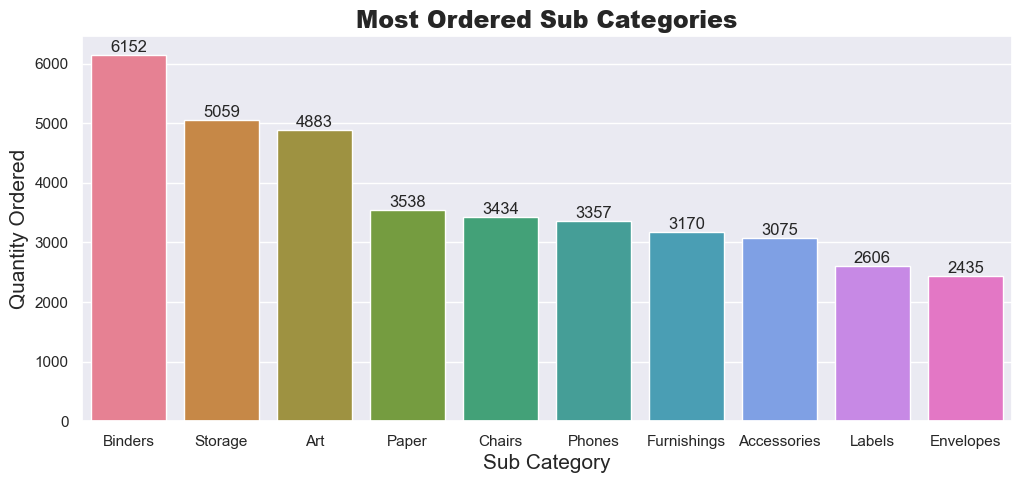

In [28]:
plt.figure(figsize=[12,5])
plt.title("Most Ordered Sub Categories", weight='heavy', size=17)
ax = sns.barplot(x = sub_category.index, y = 'order_id', data=sub_category, palette='husl')
plt.xlabel("Sub Category", size=15)
plt.ylabel("Quantity Ordered", size=15)

ax.bar_label(ax.containers[0], size=12)
plt.show()

In [29]:
region_df = df.groupby('region').count().sort_values(by='order_id', ascending=False).head(10)
region_df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,product_id,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
region,,,,,,,,,,,,,,,,,,,,,
Central,11117,11117,11117,11117,11117,11117,11117,11117,11117,11117,...,11117,11117,11117,11117,11117,11117,11117,11117,11117,11117
South,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,...,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645
EMEA,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,...,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029
North,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,...,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785
Africa,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587,...,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587
Oceania,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487,...,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487
West,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,...,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203
Southeast Asia,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129,...,3129,3129,3129,3129,3129,3129,3129,3129,3129,3129
East,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,...,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848


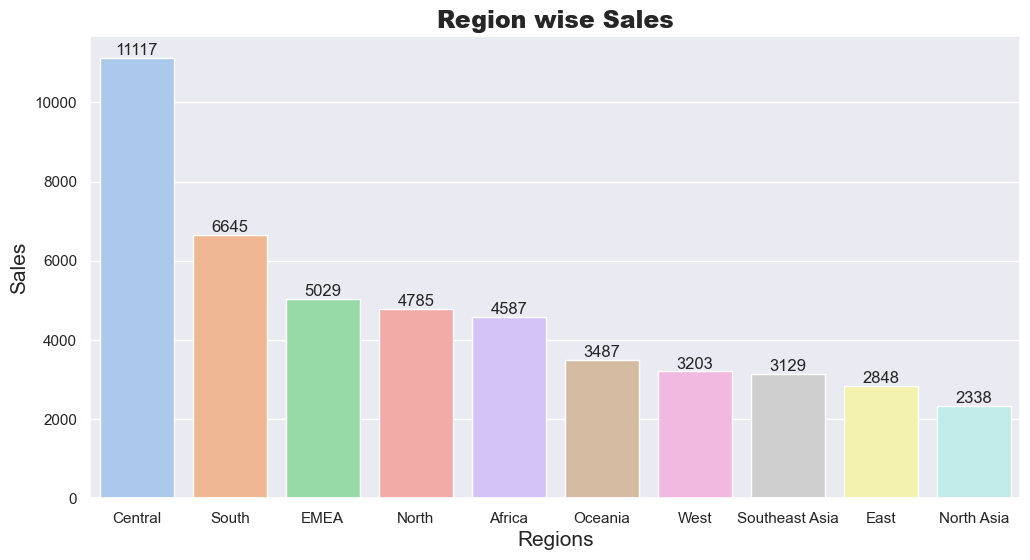

In [30]:
plt.figure(figsize=[12,6])
plt.title("Region wise Sales", weight='heavy', size=17)
ax = sns.barplot(x = region_df.index, y = region_df.order_id, palette='pastel')
plt.xlabel("Regions", size=15)
plt.ylabel("Sales", size=15)
ax.bar_label(ax.containers[0])
plt.show()

In [31]:
df_line = df[['order_date','sales','profit']].sort_values('order_date') 
df_line['Order Date'] = pd.to_datetime(df_line['order_date']) 
df_line = df_line.groupby('order_date').mean() 

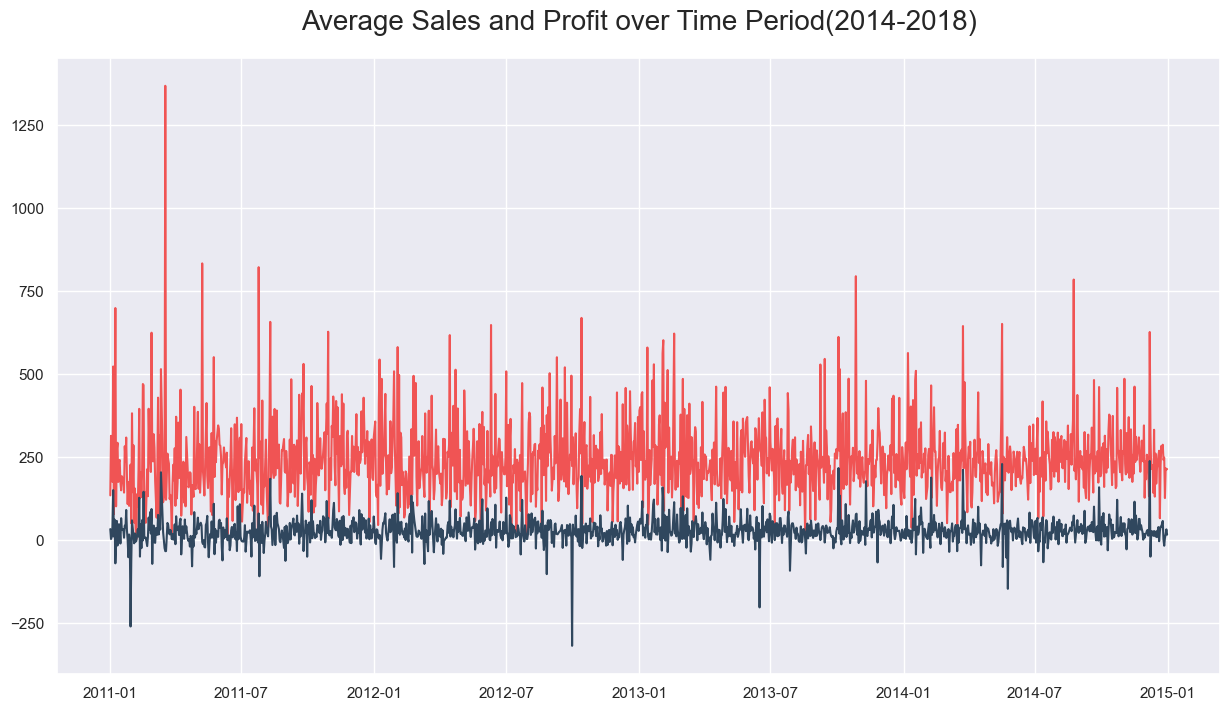

In [32]:
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'sales', data=df_line, color='#F05454') 
plt.plot(df_line.index, 'profit', data=df_line, color='#30475E') 
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)

plt.show()